Analisis de Simple sintonizados




In [18]:
import numpy as np
import scipy as sp
from math import cos, log10 
import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import Image  
from IPython.display import Image  
%matplotlib inline
params = {'legend.fontsize': 24,
          'figure.figsize': (12, 10),
         'axes.labelsize': 24,
         'axes.titlesize': 24,
         'xtick.labelsize':24,
         'ytick.labelsize':24}
plt.rcParams.update(params)



In [6]:
#Simple Sintonizado
def SS(f,fo,Q,n=1):
    return 1/((1+(Q*(f/fo-fo/f))**2))**(n/2)

def SS_Q(f,fo,A,n=1):    
    return (((1/A)**(2/n) -1 )**.5) /(f/fo-fo/f)

#Butterworth
def BT_Q(fo,BW,n,m):
    return fo/BW/np.sin((2*m-1)/n*np.pi/2)

def BT_f(fo,BW,n,m):
    return fo - BW/2*np.cos((2*m-1)/n*np.pi/2)

#Chevishev
def CV_Q(fo,BW,n,m):
    return (fo/BW/np.sin((2*m-1)/n*np.pi/2))/np.sinh(0.88137/n)

def CV_f(fo,BW,n,m):
    return fo - BW/2*np.cos((2*m-1)/n*np.pi/2)*np.cosh(0.88137/n)



#Respuesta 
def RSS(fx, filtro):
    return sum([20*np.log10(SS(fx,filtro[m]['f'],filtro[m]['Q'])) for m in filtro])


In [7]:
#Adaptadores
def Qop(x,r):
    return rp/x

def Qos(x,r):
    return x/r

def Qcp(Qop,x,rext):
    return (1/Qoc)+(x/rext)

def Qcs(Qop,x,rext):
    return (1/Qoc)+(rext/x)


In [8]:
# ejercicio 1
# Datos
rg = 50
rl = 50
rpl = 15e3
esr = 10
C   = 10e-12
Pdis= 10e-12
fo = 100e6

# a
wo = 2*np.pi*fo
L = 1/(wo**2*C)
print('L=', L)

# b
# b.1 Q = PX/PR, L y rp estan en paralelo, comparten tensión.
QoL = rpl/(wo*L)
print('QoL=',QoL)


L= 2.533029591058445e-07
QoL= 94.24777960769377


{1: {'Q': 24.40589930931932, 'f': 455000.0}, 2: {'Q': 24.40589930931932, 'f': 455000.0}, 3: {'Q': 24.40589930931932, 'f': 455000.0}}
|A(450KHz)|= -3.32701637174 dB
|A(460KHz)|= -3.26302739287 dB
|A(475KHz)|= -22.0 dB


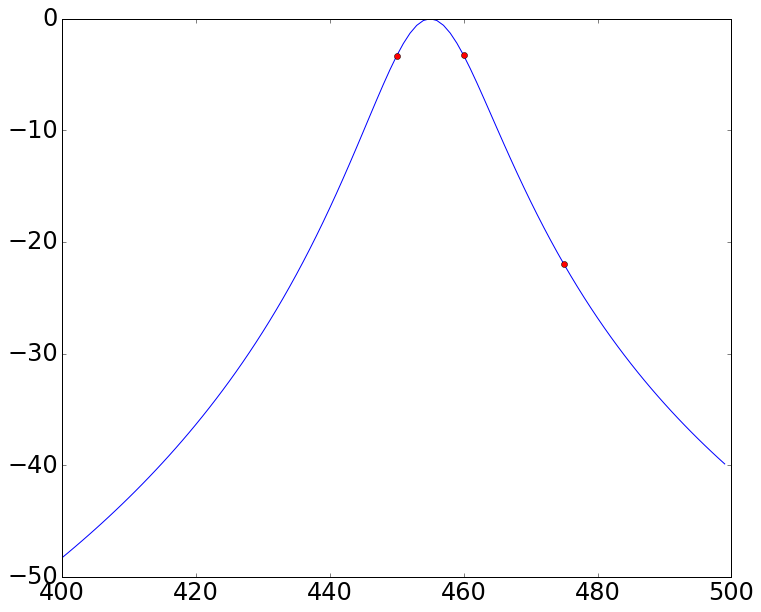

In [19]:
#SimpleSintonizadoSincronico
fo = 455e3
BW = 10e3
n = 3
SSF = dict()
for m in np.arange(1,n+1,1):
    if m not in SSF: SSF[m]=dict()
    SSF[m]['Q']= SS_Q(475e3,fo,10**(-22/20),n)     
    SSF[m]['f']= fo  

print(SSF)
print('|A(450KHz)|=',RSS(450e3,SSF), 'dB')     
print('|A(460KHz)|=',RSS(460e3,SSF), 'dB')     
print('|A(475KHz)|=',RSS(475e3,SSF), 'dB')     


freq = np.arange(400e3,500e3,1e3)    
plt.plot(freq/1e3,[RSS(fa,SSF) for fa in freq])
plt.plot(450e3/1e3,RSS(450e3,SSF) ,'ro')
plt.plot(460e3/1e3,RSS(460e3,SSF) ,'ro')
plt.plot(475e3/1e3,RSS(475e3,SSF) ,'ro')
    
plt.show()


{1: {'Q': 91.000000000000014, 'f': 450669.87298107782}, 2: {'Q': 45.5, 'f': 455000.0}, 3: {'Q': 91.000000000000014, 'f': 459330.12701892218}}
|A(455KHz)|= -12.041716113 dB
Los siguientes calculos son referenciados a 455KHz
|A(450KHz)|= -3.04678710072 dB
|A(460KHz)|= -2.97518960629 dB
|A(475KHz)|= -35.588678835 dB


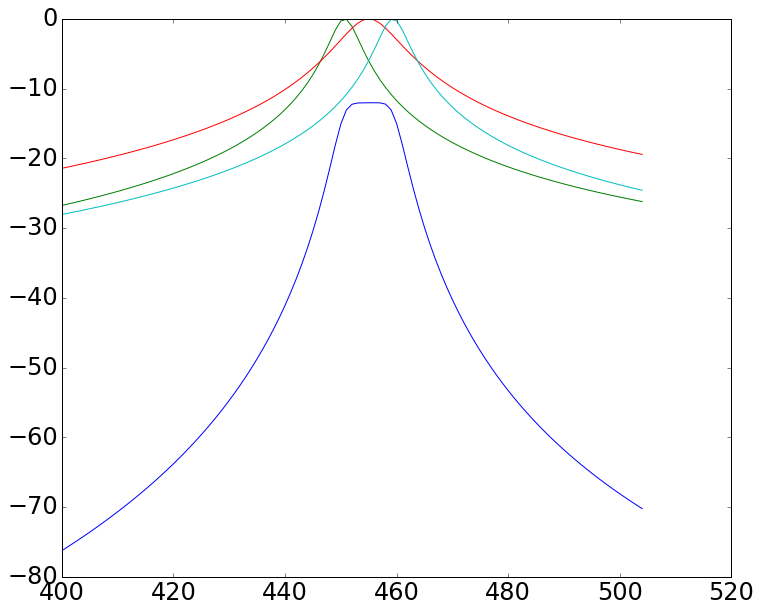

In [20]:
#Butterworth
fo = 455e3
BW = 10e3
n = 3 # numero de polos

BTF = dict()
for m in np.arange(1,n+1,1):
    if m not in BTF: BTF[m]=dict()
    BTF[m]['Q'] =BT_Q(fo,BW,n,m)     
    BTF[m]['f'] =BT_f(fo,BW,n,m)
    
print(BTF)     
print('|A(455KHz)|=',RSS(455e3,BTF), 'dB') 
print('Los siguientes calculos son referenciados a 455KHz')

print('|A(450KHz)|=',RSS(450e3,BTF)-RSS(455e3,BTF), 'dB')     
print('|A(460KHz)|=',RSS(460e3,BTF)-RSS(455e3,BTF), 'dB')     
print('|A(475KHz)|=',RSS(475e3,BTF)-RSS(455e3,BTF), 'dB')

freq = np.arange(400e3,505e3,1e3)    
plt.plot(freq/1e3,[RSS(fa,BTF) for fa in freq])
for m in np.arange(1,n+1,1):
    BTFn = dict()
    BTFn[m] =  BTF[m]
    plt.plot(freq/1e3,[RSS(fa,BTFn) for fa in freq])
#plt.plot(445e3/1e3,RSS(445e3,BTF) ,'ro')
#plt.plot(465e3/1e3,RSS(465e3,BTF) ,'ro')
#plt.plot(475e3/1e3,RSS(475e3,BTF) ,'ro')
plt.show()



{1: {'Q': 305.33370537939072, 'f': 450481.65280692233}, 2: {'Q': 152.66685268969533, 'f': 455000.0}, 3: {'Q': 305.33370537939072, 'f': 459518.34719307767}}
|A(455KHz)|= -31.544593767 dB
Los siguientes calculos son referenciados a 455KHz
|A(450KHz)|= -3.08653542221 dB
|A(460KHz)|= -2.93616562528 dB
|A(475KHz)|= -47.1952053647 dB


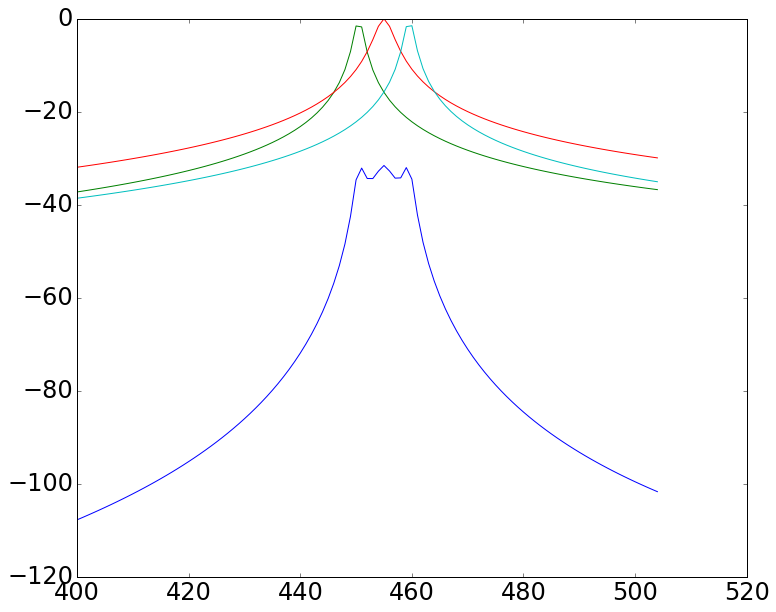

In [21]:
#Chevishev
fo = 455e3
BW = 10e3
n = 3 # numero de polos

CVF = dict()
for m in np.arange(1,n+1,1):
    if m not in CVF: CVF[m]=dict()
    CVF[m]['Q'] =CV_Q(fo,BW,n,m)     
    CVF[m]['f'] =CV_f(fo,BW,n,m)
    
print(CVF)     
print('|A(455KHz)|=',RSS(455e3,CVF), 'dB') 
print('Los siguientes calculos son referenciados a 455KHz')

print('|A(450KHz)|=',RSS(450e3,CVF)-RSS(455e3,CVF), 'dB')     
print('|A(460KHz)|=',RSS(460e3,CVF)-RSS(455e3,CVF), 'dB')     
print('|A(475KHz)|=',RSS(475e3,CVF)-RSS(455e3,CVF), 'dB')

freq = np.arange(400e3,505e3,1e3)    
plt.plot(freq/1e3,[RSS(fa,CVF) for fa in freq])
for m in np.arange(1,n+1,1):
    CVFn = dict()
    CVFn[m] =  CVF[m]
    plt.plot(freq/1e3,[RSS(fa,CVFn) for fa in freq])
#plt.plot(445e3/1e3,RSS(445e3,BTF) ,'ro')
#plt.plot(465e3/1e3,RSS(465e3,BTF) ,'ro')
#plt.plot(475e3/1e3,RSS(475e3,BTF) ,'ro')
plt.show()



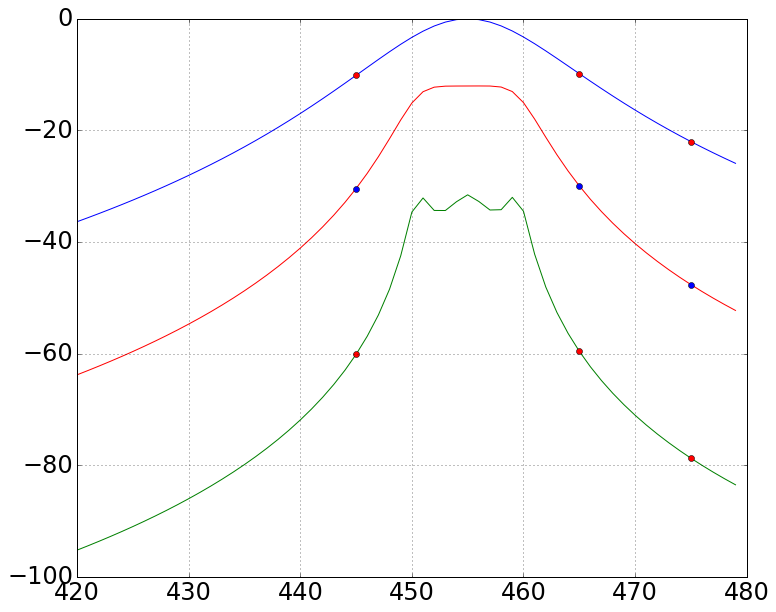

In [22]:
freq = np.arange(420e3,480e3,1e3)    
plt.plot(freq/1e3,[RSS(fa,SSF) for fa in freq], 'b')
plt.plot(445e3/1e3,RSS(445e3,SSF) ,'ro')
plt.plot(465e3/1e3,RSS(465e3,SSF) ,'ro')
plt.plot(475e3/1e3,RSS(475e3,SSF) ,'ro')
#Butterworth

plt.plot(freq/1e3,[RSS(fa,BTF) for fa in freq],'r')
plt.plot(445e3/1e3,RSS(445e3,BTF) ,'bo')
plt.plot(465e3/1e3,RSS(465e3,BTF) ,'bo')
plt.plot(475e3/1e3,RSS(475e3,BTF) ,'bo')

#Chevishev
plt.plot(freq/1e3,[RSS(fa,CVF) for fa in freq], 'g')
plt.plot(445e3/1e3,RSS(445e3,CVF) ,'ro')
plt.plot(465e3/1e3,RSS(465e3,CVF) ,'ro')
plt.plot(475e3/1e3,RSS(475e3,CVF),'ro')
plt.grid()
plt.show()

OJO que el filtro Butterworth tiene que amplificar : 12.041716113 dB para que podamos comparalo con un simple sintonizado sincronico
OJO que el fitro Chevishev tiene que amplificar : 31.544593767 dB para que podamos comparalo con un simple sintonizado sincronico


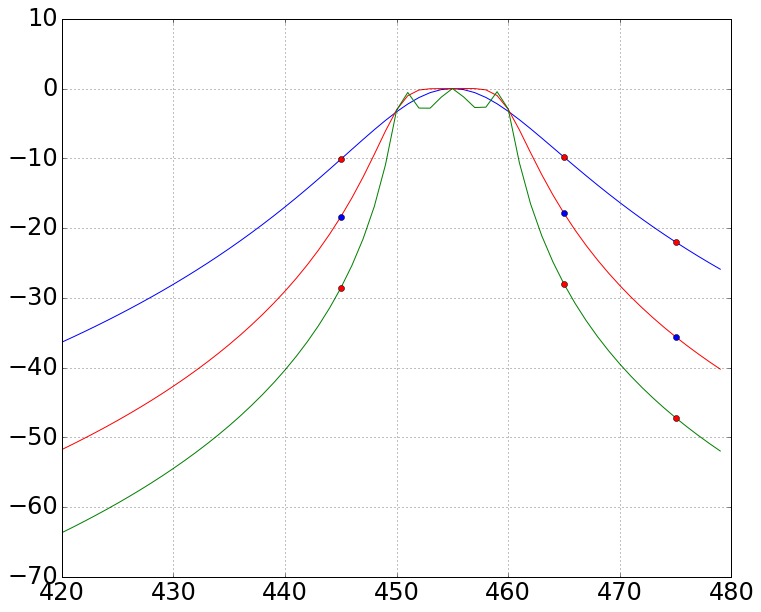

In [23]:
freq = np.arange(420e3,480e3,1e3)    
plt.plot(freq/1e3,[RSS(fa,SSF) for fa in freq], 'b')
plt.plot(445e3/1e3,RSS(445e3,SSF) ,'ro')
plt.plot(465e3/1e3,RSS(465e3,SSF) ,'ro')
plt.plot(475e3/1e3,RSS(475e3,SSF) ,'ro')
#Butterworth
print('OJO que el filtro Butterworth tiene que amplificar :', abs(RSS(455e3,BTF)), 'dB para que podamos comparalo con un simple sintonizado sincronico')     
plt.plot(freq/1e3,[RSS(fa,BTF)-RSS(455e3,BTF) for fa in freq],'r')
plt.plot(445e3/1e3,RSS(445e3,BTF)-RSS(455e3,BTF) ,'bo')
plt.plot(465e3/1e3,RSS(465e3,BTF)-RSS(455e3,BTF) ,'bo')
plt.plot(475e3/1e3,RSS(475e3,BTF)-RSS(455e3,BTF) ,'bo')

#Chevishev
print('OJO que el fitro Chevishev tiene que amplificar :', abs(RSS(455e3,CVF)), 'dB para que podamos comparalo con un simple sintonizado sincronico')     
plt.plot(freq/1e3,[RSS(fa,CVF)-RSS(455e3,CVF) for fa in freq], 'g')
plt.plot(445e3/1e3,RSS(445e3,CVF)-RSS(455e3,CVF) ,'ro')
plt.plot(465e3/1e3,RSS(465e3,CVF)-RSS(455e3,CVF) ,'ro')
plt.plot(475e3/1e3,RSS(475e3,CVF)-RSS(455e3,CVF) ,'ro')
plt.grid()
plt.show()